<a href="https://colab.research.google.com/github/sanjuparampil/GROUP_ASSIGNMENT_49/blob/main/GROUP_ASSIGNMENT_49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Fri May 12 18:43:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, losses, callbacks,regularizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
train =  '/content/drive/MyDrive/Group_Project_Data 2/Group_Project_Data/Train'
test = '/content/drive/MyDrive/Group_Project_Data 2/Group_Project_Data/Valid'

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Group_Project_Data 2/Group_Project_Data')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set batch size
batch_size = 32

# Create data generator for training data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(64, 64),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size,
    classes=["Real","Fake"])

# Create data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(64, 64),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size,
    classes=["Real","Fake"])

# Define the number of train and validation samples
train_samples = train_generator.samples
test_samples = test_generator.samples

x_train, y_train = train_generator.next()

x_test, y_test = test_generator.next()
# Define the number of classes
num_classes = train_generator.class_indices

# Print the train and validation data shape and number of classes
print('Train data shape:', train_generator.image_shape)
print('Validation data shape:', test_generator.image_shape)
print('Number of classes:', num_classes)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Train data shape: (64, 64, 1)
Validation data shape: (64, 64, 1)
Number of classes: {'Real': 0, 'Fake': 1}


IndexError: ignored

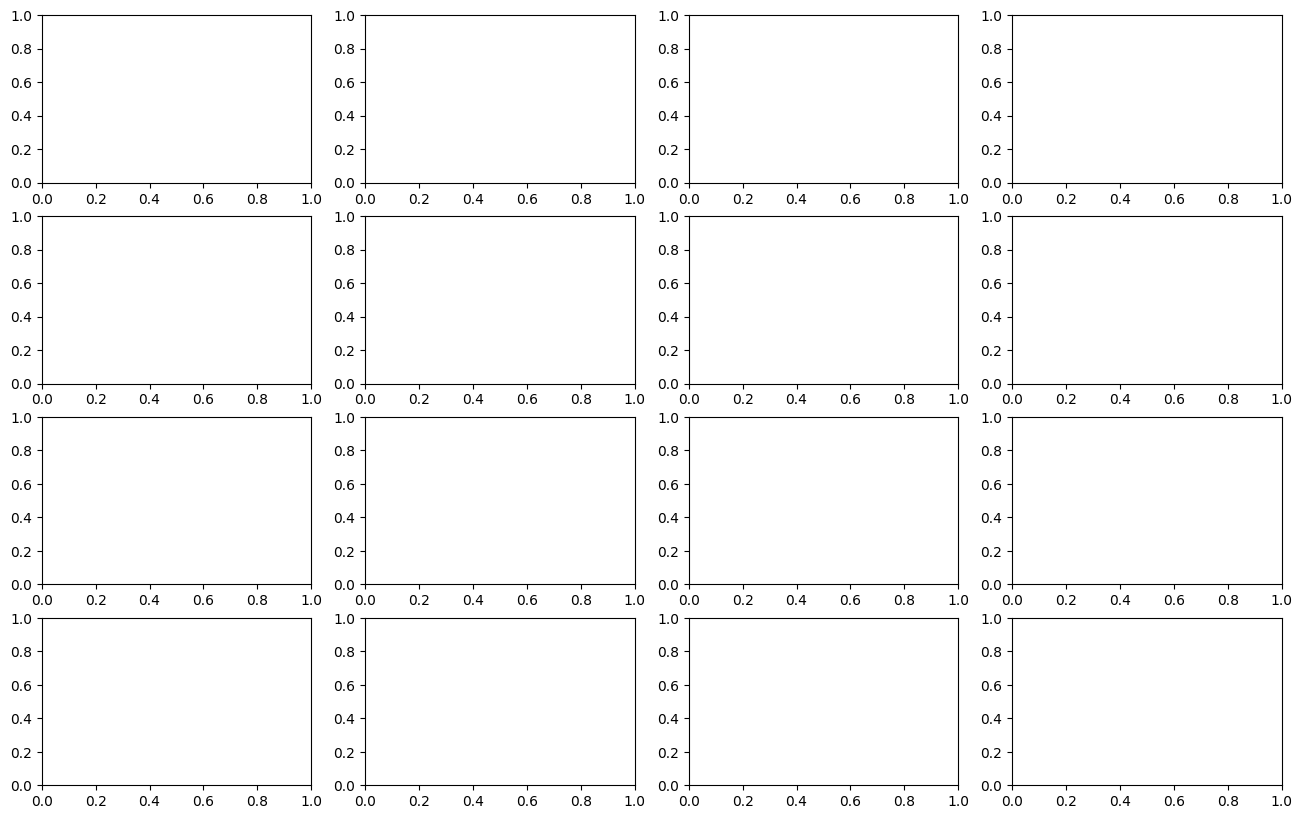

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 10))
for i in range(16):
    ax[i//4, i%4].imshow(x_train[i])
    if y_train[i] == 1:
        ax[i//4, i%4].set_title('Fake')
    else:
        ax[i//4, i%4].set_title('Real')
    ax[i//4, i%4].axis('off')
plt.show()

In [ ]:

# Add input layer
Input = layers.Input(shape=(64, 64, 1),dtype="float32",name="input_layer")

# Add convolutional layers
conv_1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(Input)
conv_2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv_1)
pool_1 = layers.MaxPooling2D((2, 2))(conv_2)
conv_3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool_1)
conv_4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv_3)
pool_2 = layers.MaxPooling2D((2, 2))(conv_4)
conv_5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool_2)
conv_6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv_5)
pool_3 = layers.MaxPooling2D((2, 2))(conv_6)

# Add dense layers
flat = layers.Flatten()(pool_3)
dense_1 = layers.Dense(512, activation='relu')(flat)
drop_1 = layers.Dropout(0.5)(dense_1)
dense_2 = layers.Dense(256, activation='relu')(drop_1)
drop_2 = layers.Dropout(0.4)(dense_2)
dense_3 = layers.Dense(128, activation='relu')(drop_2)
drop_3 = layers.Dropout(0.3)(dense_3)
dense_4 = layers.Dense(64, activation='relu')(drop_3)
drop_4 = layers.Dropout(0.2)(dense_4)
dense_5 = layers.Dense(32, activation='relu')(drop_4)
drop_5 = layers.Dropout(0.1)(dense_5)
Output = layers.Dense(1, activation='sigmoid')(drop_5)

model = models.Model(inputs=Input,outputs=Output,name="model_2")

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])
model.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                           

In [ ]:

# Train model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))


ValueError: ignored

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: ignored

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(x_test.shape)

ValueError: ignored

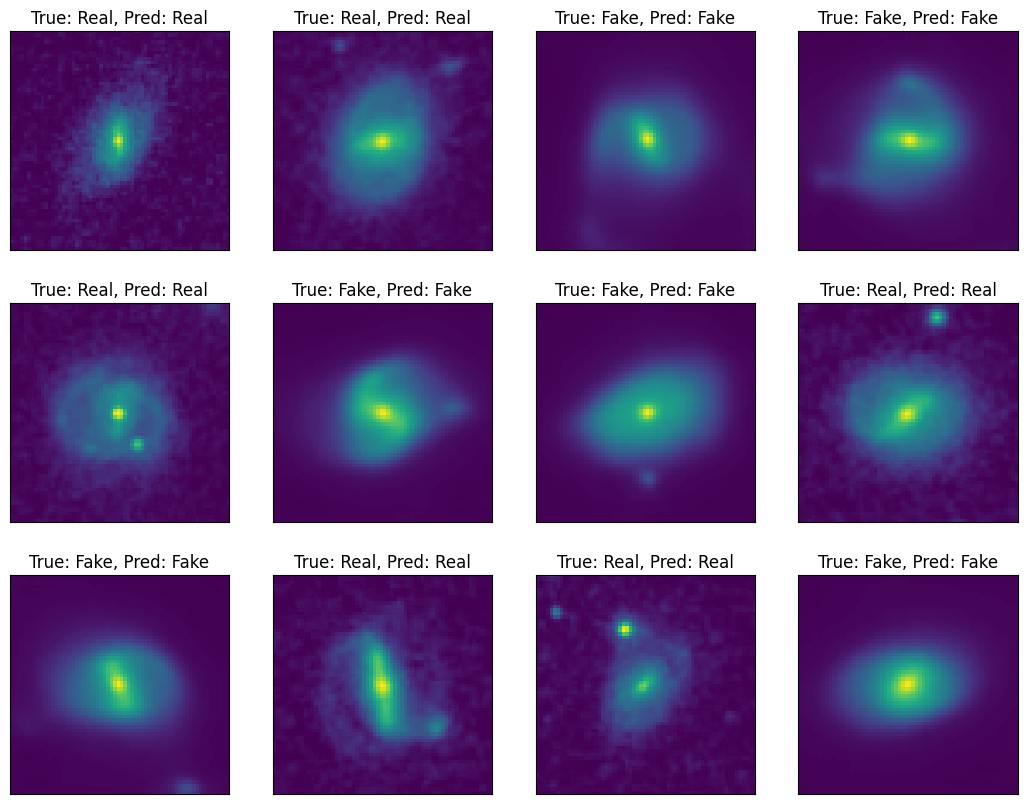

In [ ]:
num_classes = train_generator.class_indices
class_names = list(num_classes.keys())
f, ax = plt.subplots(3,4, figsize=(13, 10))
ax = ax.flatten()
for i in range(len(ax)):
    if i < len(x_test):
        ax[i].imshow(x_test[i,:,:])
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title("True: {}, Pred: {}".format(class_names[int(y_test[i])],class_names[int(y_pred[i])]))
    else:
        ax[i].axis('off')
plt.show()



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
# Calculate classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# Calculate AUC ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print('AUC ROC:', auc_roc)

              precision    recall  f1-score   support

        Real       1.00      1.00      1.00        18
        Fake       1.00      1.00      1.00        14

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

AUC ROC: 1.0
